# **Sentiment Analysis APK E-commerce Tokopedia using LSTM and GRU**

# **Import Library**

In [ ]:
!pip install sastrawi
!pip install wordcloud
!pip install nltk
!pip install tensorflow
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import re
import string
import nltk
from google_play_scraper import reviews_all, Sort
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Loading Dataset lewat G-Drive**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ulasan_tokopedia_path = '/content/drive/MyDrive/ulasan_tokopedia.csv'
clean_df = pd.read_csv(ulasan_tokopedia_path)

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,796cbd9d-524c-47d3-9b28-36ccb8eb0f81,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tokped ini sebenarnya bagus, banyak promo.. ta...",3,69,3.272.0,2024-07-25 18:47:53,"Makasih atas ratingnya, Toppers. Jika kamu mem...",2024-07-25 18:59:02,3.272.0
1,1ca4cd9e-4389-4fe9-ba1e-4903213b7dfa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kekurangan Tokopedia bagi saya hanya pengirima...,3,43,3.272.0,2024-07-27 17:54:08,"Terima kasih atas rating yang kamu berikan, To...",2024-07-27 17:59:01,3.272.0
2,be5049bf-bff4-4ca9-a644-f932c60bfdac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya pelanggan baru. Awalnya sebagai pelanggan...,1,667,3.269.0,2024-06-29 16:15:31,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-06-29 16:53:01,3.269.0
3,c0c8effc-fbb1-4795-ba1d-040a4ca73083,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kekurangan setelah update: 1. Slide Display pr...,2,96,3.269.0,2024-07-06 10:46:46,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-07-06 11:13:03,3.269.0
4,2e4214b1-b244-422b-b988-604b3c56cf43,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dulu sering belanja karena suka dpt promo cash...,1,30,3.272.0,2024-07-25 16:55:02,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-07-25 16:59:06,3.272.0
...,...,...,...,...,...,...,...,...,...,...,...
184495,277e83ff-8c64-4ac7-a8b0-b5df3bd2ade9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sementara ini toped plng lancar transaksinya d...,5,3,3.54,2019-12-07 06:27:12,"Hai Adi, mohon maaf sekali ya atas kendala yan...",2019-02-15 03:34:45,3.54
184496,024d3b58-d8a1-4cf2-a475-2fe1022373f3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gak ultah gak hari biasa sama saja . produk ju...,1,0,NaN,2023-08-08 15:30:42,NaN,NaN,NaN
184497,33d8dcfb-38cd-4e8a-8be9-de51b5e68745,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ini kenapa out mulu sih tokped? Baru di klik, ...",3,0,3.65,2020-03-17 11:02:48,"Hai Toppers, maaf atas ketidaknyamanannya , ka...",2020-03-17 12:16:58,3.65
184498,7bc3fd56-d1d4-4f56-b9cf-4a6450c453d5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sekarang dihalaman pembayaran ngga bs di klik,4,2,3.7,2018-11-20 05:07:09,"Hai Toppers, terima kasih atas informasinya, a...",2017-09-20 09:18:22,3.7


In [ ]:
clean_df = clean_df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63912 entries, 0 to 184499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              63912 non-null  object
 1   userName              63912 non-null  object
 2   userImage             63912 non-null  object
 3   content               63912 non-null  object
 4   score                 63912 non-null  int64 
 5   thumbsUpCount         63912 non-null  int64 
 6   reviewCreatedVersion  63912 non-null  object
 7   at                    63912 non-null  object
 8   replyContent          63912 non-null  object
 9   repliedAt             63912 non-null  object
 10  appVersion            63912 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.9+ MB


In [ ]:
clean_df = clean_df.drop_duplicates()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63912 entries, 0 to 184499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              63912 non-null  object
 1   userName              63912 non-null  object
 2   userImage             63912 non-null  object
 3   content               63912 non-null  object
 4   score                 63912 non-null  int64 
 5   thumbsUpCount         63912 non-null  int64 
 6   reviewCreatedVersion  63912 non-null  object
 7   at                    63912 non-null  object
 8   replyContent          63912 non-null  object
 9   repliedAt             63912 non-null  object
 10  appVersion            63912 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.9+ MB


In [ ]:
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
print(f"Jumlah ulasan setelah menghapus duplikat: {jumlah_ulasan_setelah_hapus_duplikat}")
print(f"Jumlah kolom setelah menghapus duplikat: {jumlah_kolom_setelah_hapus_duplikat}")
clean_df.shape

Jumlah ulasan setelah menghapus duplikat: 63912
Jumlah kolom setelah menghapus duplikat: 11


(63912, 11)

# **Preprocessing**

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,796cbd9d-524c-47d3-9b28-36ccb8eb0f81,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tokped ini sebenarnya bagus, banyak promo.. ta...",3,69,3.272.0,2024-07-25 18:47:53,"Makasih atas ratingnya, Toppers. Jika kamu mem...",2024-07-25 18:59:02,3.272.0
1,1ca4cd9e-4389-4fe9-ba1e-4903213b7dfa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kekurangan Tokopedia bagi saya hanya pengirima...,3,43,3.272.0,2024-07-27 17:54:08,"Terima kasih atas rating yang kamu berikan, To...",2024-07-27 17:59:01,3.272.0
2,be5049bf-bff4-4ca9-a644-f932c60bfdac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya pelanggan baru. Awalnya sebagai pelanggan...,1,667,3.269.0,2024-06-29 16:15:31,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-06-29 16:53:01,3.269.0
3,c0c8effc-fbb1-4795-ba1d-040a4ca73083,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kekurangan setelah update: 1. Slide Display pr...,2,96,3.269.0,2024-07-06 10:46:46,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-07-06 11:13:03,3.269.0
4,2e4214b1-b244-422b-b988-604b3c56cf43,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dulu sering belanja karena suka dpt promo cash...,1,30,3.272.0,2024-07-25 16:55:02,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-07-25 16:59:06,3.272.0
...,...,...,...,...,...,...,...,...,...,...,...
184494,7c61576c-8b0f-4bce-81eb-f6fca0e77c8c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Biaya nya nambah lagi History belanja lama jad...,1,1,3.242,2023-11-22 17:32:12,"Toppers, mohon maaf atas kendala yang kamu ala...",2023-11-22 17:40:01,3.242
184495,277e83ff-8c64-4ac7-a8b0-b5df3bd2ade9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sementara ini toped plng lancar transaksinya d...,5,3,3.54,2019-12-07 06:27:12,"Hai Adi, mohon maaf sekali ya atas kendala yan...",2019-02-15 03:34:45,3.54
184497,33d8dcfb-38cd-4e8a-8be9-de51b5e68745,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ini kenapa out mulu sih tokped? Baru di klik, ...",3,0,3.65,2020-03-17 11:02:48,"Hai Toppers, maaf atas ketidaknyamanannya , ka...",2020-03-17 12:16:58,3.65
184498,7bc3fd56-d1d4-4f56-b9cf-4a6450c453d5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sekarang dihalaman pembayaran ngga bs di klik,4,2,3.7,2018-11-20 05:07:09,"Hai Toppers, terima kasih atas informasinya, a...",2017-09-20 09:18:22,3.7


In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,796cbd9d-524c-47d3-9b28-36ccb8eb0f81,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tokped ini sebenarnya bagus, banyak promo.. ta...",3,69,3.272.0,2024-07-25 18:47:53,"Makasih atas ratingnya, Toppers. Jika kamu mem...",2024-07-25 18:59:02,3.272.0,Tokped ini sebenarnya bagus banyak promo tapi ...,tokped ini sebenarnya bagus banyak promo tapi ...,tokped ini sebenarnya bagus banyak promo tapi ...,"[tokped, ini, sebenarnya, bagus, banyak, promo...","[tokped, bagus, promo, sayang, ekspedisi, si, ...",tokped bagus promo sayang ekspedisi si cepat a...
1,1ca4cd9e-4389-4fe9-ba1e-4903213b7dfa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kekurangan Tokopedia bagi saya hanya pengirima...,3,43,3.272.0,2024-07-27 17:54:08,"Terima kasih atas rating yang kamu berikan, To...",2024-07-27 17:59:01,3.272.0,Kekurangan Tokopedia bagi saya hanya pengirima...,kekurangan tokopedia bagi saya hanya pengirima...,kekurangan tokopedia bagi saya hanya pengirima...,"[kekurangan, tokopedia, bagi, saya, hanya, pen...","[kekurangan, tokopedia, pengiriman, banget, pe...",kekurangan tokopedia pengiriman banget pembeli...
2,be5049bf-bff4-4ca9-a644-f932c60bfdac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya pelanggan baru. Awalnya sebagai pelanggan...,1,667,3.269.0,2024-06-29 16:15:31,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-06-29 16:53:01,3.269.0,Saya pelanggan baru Awalnya sebagai pelanggan ...,saya pelanggan baru awalnya sebagai pelanggan ...,saya pelanggan baru awalnya sebagai pelanggan ...,"[saya, pelanggan, baru, awalnya, sebagai, pela...","[pelanggan, pelanggan, promo, hemat, menggiurk...",pelanggan pelanggan promo hemat menggiurkan ba...
3,c0c8effc-fbb1-4795-ba1d-040a4ca73083,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kekurangan setelah update: 1. Slide Display pr...,2,96,3.269.0,2024-07-06 10:46:46,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-07-06 11:13:03,3.269.0,Kekurangan setelah update Slide Display produ...,kekurangan setelah update slide display produ...,kekurangan setelah update slide display produk...,"[kekurangan, setelah, update, slide, display, ...","[kekurangan, update, slide, display, produk, a...",kekurangan update slide display produk auto ge...
4,2e4214b1-b244-422b-b988-604b3c56cf43,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dulu sering belanja karena suka dpt promo cash...,1,30,3.272.0,2024-07-25 16:55:02,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-07-25 16:59:06,3.272.0,dulu sering belanja karena suka dpt promo cash...,dulu sering belanja karena suka dpt promo cash...,dulu sering belanja karena suka dapat promo ca...,"[dulu, sering, belanja, karena, suka, dapat, p...","[belanja, suka, promo, cashback, suka, promo, ...",belanja suka promo cashback suka promo diskon ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184494,7c61576c-8b0f-4bce-81eb-f6fca0e77c8c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Biaya nya nambah lagi History belanja lama jad...,1,1,3.242,2023-11-22 17:32:12,"Toppers, mohon maaf atas kendala yang kamu ala...",2023-11-22 17:40:01,3.242,Biaya nya nambah lagi History belanja lama jad...,biaya nya nambah lagi history belanja lama jad...,biaya nya nambah lagi history belanja lama jad...,"[biaya, nya, nambah, lagi, history, belanja, l...","[biaya, nambah, history, belanja, hilang]",biaya nambah history belanja hilang
184495,277e83ff-8c64-4ac7-a8b0-b5df3bd2ade9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sementara ini toped plng lancar transaksinya d...,5,3,3.54,2019-12-07 06:27:12,"Hai Adi, mohon maaf sekali ya atas kendala yan...",2019-02-15 03:34:45,3.54,sementara ini toped plng lancar transaksiny

# **Pelabelan**

In [ ]:
import requests
import csv
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

In [ ]:
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]

    polarity = ''
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

print(clean_df['polarity'].value_counts())

polarity
positive    30141
negative    28574
neutral      5197
Name: count, dtype: int64


**Visualisasi Polarity Sentimen Review dari Data**

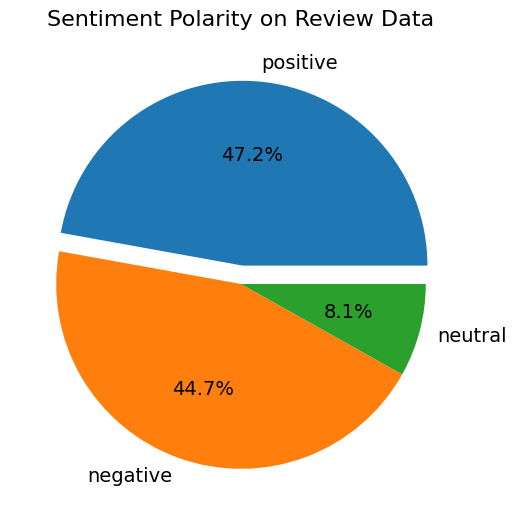

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

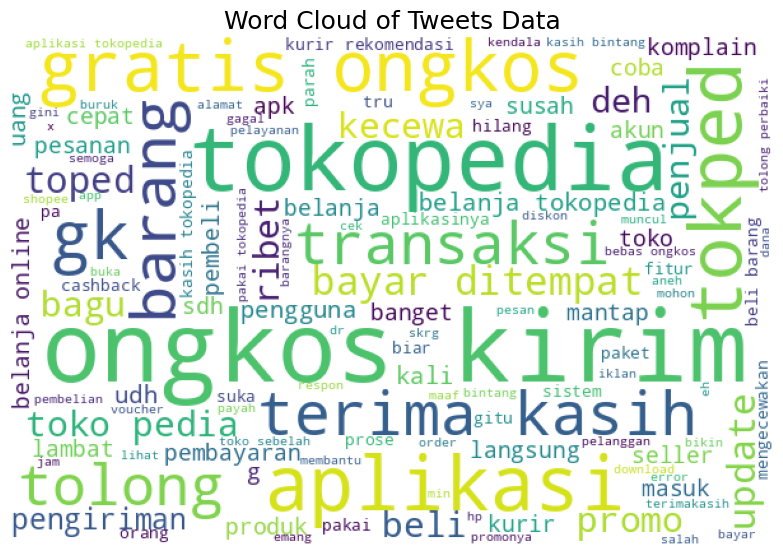

In [ ]:
list_words = ''
for tweet in clean_df['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [ ]:
# Ekstraksi Fitur dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500, min_df=5, max_df=0.7)
X_tfidf = tfidf_vectorizer.fit_transform(clean_df['text_akhir']).toarray()

In [ ]:
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
y_encoded = clean_df['polarity'].map(label_mapping)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# **Pelatihan dengan LSTM**

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(input_shape,)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_lstm = build_lstm_model(X_train.shape[1])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7476 - loss: 0.8931 - val_accuracy: 0.8266 - val_loss: 0.5432
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8322 - loss: 0.5219 - val_accuracy: 0.8304 - val_loss: 0.5189
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8426 - loss: 0.4982 - val_accuracy: 0.8416 - val_loss: 0.5024
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8465 - loss: 0.4922 - val_accuracy: 0.8470 - val_loss: 0.4895
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8513 - loss: 0.4755 - val_accuracy: 0.8524 - val_loss: 0.4846
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8567 - loss: 0.4614 - val_accuracy: 0.8548 - val_loss: 0.4747
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8556 - loss: 0.4593 - val_accuracy: 0.8528 - val_loss: 0.4748
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8576 - loss: 0.4565 - val_a

In [ ]:
# Evaluasi Model LSTM
y_pred_lstm = model_lstm.predict(X_test)
y_pred_classes_lstm = np.argmax(y_pred_lstm, axis=1)

print(classification_report(y_test, y_pred_classes_lstm))

train_accuracy_lstm = model_lstm.evaluate(X_train, y_train)[1]
test_accuracy_lstm = model_lstm.evaluate(X_test, y_test)[1]

print(f"Training Accuracy: {train_accuracy_lstm}")
print(f"Test Accuracy: {test_accuracy_lstm}")

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5699
           1       0.64      0.40      0.49      1013
           2       0.87      0.91      0.89      6071

    accuracy                           0.86     12783
   macro avg       0.80      0.73      0.75     12783
weighted avg       0.85      0.86      0.86     12783

1598/1598 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8704 - loss: 0.4276
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8628 - loss: 0.4626
Training Accuracy: 0.8702692985534668
Test Accuracy: 0.8612219095230103


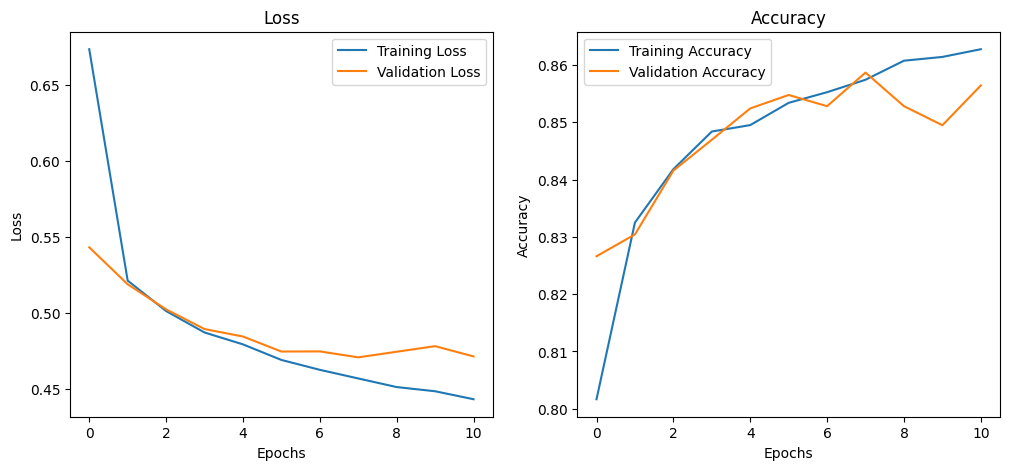

In [ ]:
# Plot Kurva untuk melihat validasi loss dan akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **Pelatihan dengan GRU**

In [ ]:
def build_gru_model(input_shape):
    model = Sequential()
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(input_shape,)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_gru = build_gru_model(X_train.shape[1])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_gru = model_gru.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7517 - loss: 0.8953 - val_accuracy: 0.8295 - val_loss: 0.5406
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8362 - loss: 0.5178 - val_accuracy: 0.8413 - val_loss: 0.5155
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8433 - loss: 0.4961 - val_accuracy: 0.8473 - val_loss: 0.4952
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8484 - loss: 0.4794 - val_accuracy: 0.8467 - val_loss: 0.4891
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8495 - loss: 0.4752 - val_accuracy: 0.8316 - val_loss: 0.5261
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8578 - loss: 0.4622 - val_accuracy: 0.8503 - val_loss: 0.4826
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8568 - loss: 0.4593 - val_accuracy: 0.8492 - val_loss: 0.4800
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8607 - loss: 0.4519 - val_

In [ ]:
# Evaluasi Model GRU
y_pred_gru = model_gru.predict(X_test)
y_pred_classes_gru = np.argmax(y_pred_gru, axis=1)

print(classification_report(y_test, y_pred_classes_gru))

train_accuracy_gru = model_gru.evaluate(X_train, y_train)[1]
test_accuracy_gru = model_gru.evaluate(X_test, y_test)[1]

print(f"Training Accuracy: {train_accuracy_gru}")
print(f"Test Accuracy: {test_accuracy_gru}")

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5699
           1       0.70      0.38      0.49      1013
           2       0.87      0.91      0.89      6071

    accuracy                           0.86     12783
   macro avg       0.81      0.73      0.75     12783
weighted avg       0.85      0.86      0.85     12783

1598/1598 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8778 - loss: 0.4097
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8620 - loss: 0.4586
Training Accuracy: 0.8754913806915283
Test Accuracy: 0.8606743216514587


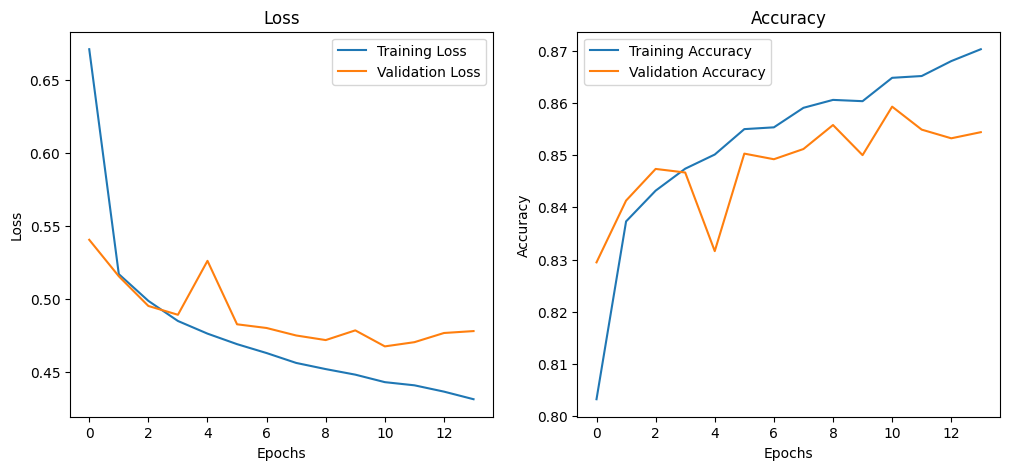

In [ ]:
# Plot Kurva untuk melihat validasi loss dan akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **Testing**

In [ ]:
# Inferensi atau Testing dari Model GRU
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf_vectorizer.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = model_gru.predict(X_kalimat_baru)
prediksi_kelas = np.argmax(prediksi_sentimen, axis=1)

# Menampilkan hasil prediksi
if prediksi_kelas[0] == 2:
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_kelas[0] == 1:
    print("Sentimen kalimat baru adalah NETRAL.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: Fiturnya terlalu ribet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Sentimen kalimat baru adalah NEGATIF.
